In [1]:
! pip install pykrakenapi

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pykrakenapi: filename=pykrakenapi-0.2.1-py3-none-any.whl size=22332 sha256=5a243bbaa8c9a3f35cfb2709d4fcdb485c41061f64b3fe992d164acb36da7e56
  Stored in directory: /Users/ulyssepiediscalzi/Library/Caches/pip/wheels/73/91/a9/8062c8dac963a65b72a462cd149072a4222976028f504b287b
  Created wheel for krakenex: filename=krakenex-2.1.0-py3-none-any.whl size=22515 sha256=330c67ace8b5da754574347e24cf14353ff3ed2d15eec2b4478f14a0caf78204
  Stored in directory: /Users/ulyssepiediscalzi/Library/Caches/pip/wheels/24/d4/6d/b8a59e71f1950c5dfb217fa24b74a868140e064070ec4bf9c4
Successfully built pykrakenapi krakenex


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pykrakenapi as k
import krakenex
from pykrakenapi import KrakenAPI
import datetime as dt
import ipywidgets as widgets
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import matplotlib.dates as mdates

# Quick Bitcoin Historical data visualizations

## Plotting the historical volume and average price from Kraken API

By accessing Kraken's API using the low-level krakenex python package, we can plot the average price and volume of Bitcoin since 2020. In this graph, we annotate the highest price of Bitcoin in this period of time.

In [181]:
api = krakenex.API()
k = KrakenAPI(api)
ohlc_btc, last = k.get_ohlc_data("XBTUSD",  interval=1440, ascending = True)

In [182]:
ohlc_btc.index = pd.to_datetime(ohlc.index, format = '%Y/%m/%d').strftime('%Y-%m-%d')

In [1]:
def annot_max(x,y, ax=None):
    '''function to annotate the highest point of a graph'''
    highest_date = x[np.argmax(y)]
    highest = y.max()
    text1= f" Date: {highest_date}, Highest VWAP: {round(highest, 2)}$ "
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text1, xy=(highest_date, highest), xytext=(.9,.98), **kw)

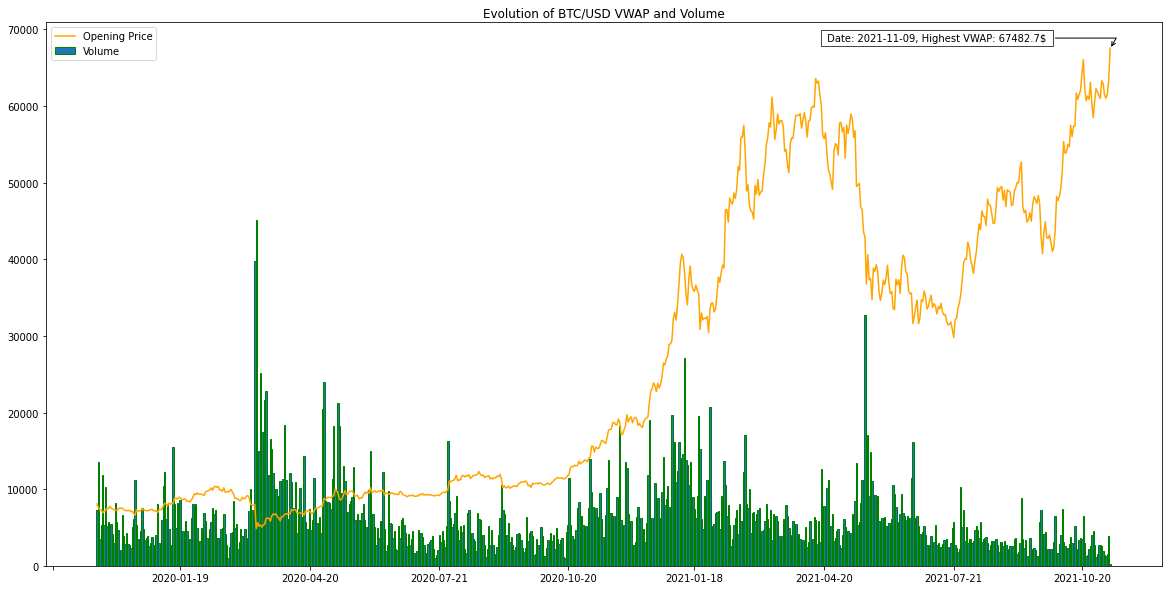

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)
ax.plot(ohlc_btc.index, ohlc_btc.open, label = 'Opening Price', c = 'orange')
ax.bar(ohlc_btc.index, ohlc_btc.volume, label = 'Volume', width =1, edgecolor= 'green' )
ax.legend(loc = 2)
fmt_half_year = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(fmt_half_year)
plt.title('Evolution of BTC/USD VWAP and Volume')

annot_max(ohlc_btc.index, ohlc_btc.vwap)

In [13]:
df = pd.read_csv('Perso/BTC_data.csv')
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [14]:
df.dropna(inplace = True)
df['Date'] = df['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x)) #converting timestamp
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 02:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 10:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 11:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 12:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2011-12-31 23:16:00


In [15]:
yearly_mean = df.groupby(df['Date'].dt.strftime('%Y'))[['Volume_(BTC)']].mean()

In [17]:
yearly_mean_currency = df.groupby(df['Date'].dt.strftime('%Y'))[['Volume_(Currency)']].mean()

## Plotting the volume evolution both in BTC and USD using .csv file

Here, I used a Kaggle Dataset that gathers different information about Bitcoin since 2011, such as the daily volume in BTC and currency. On this graph, we can see the Evolution of the Average Daily Bitcoin Volume per Year. The size of the dots is linked to the Average Daily USD Volume per Year.

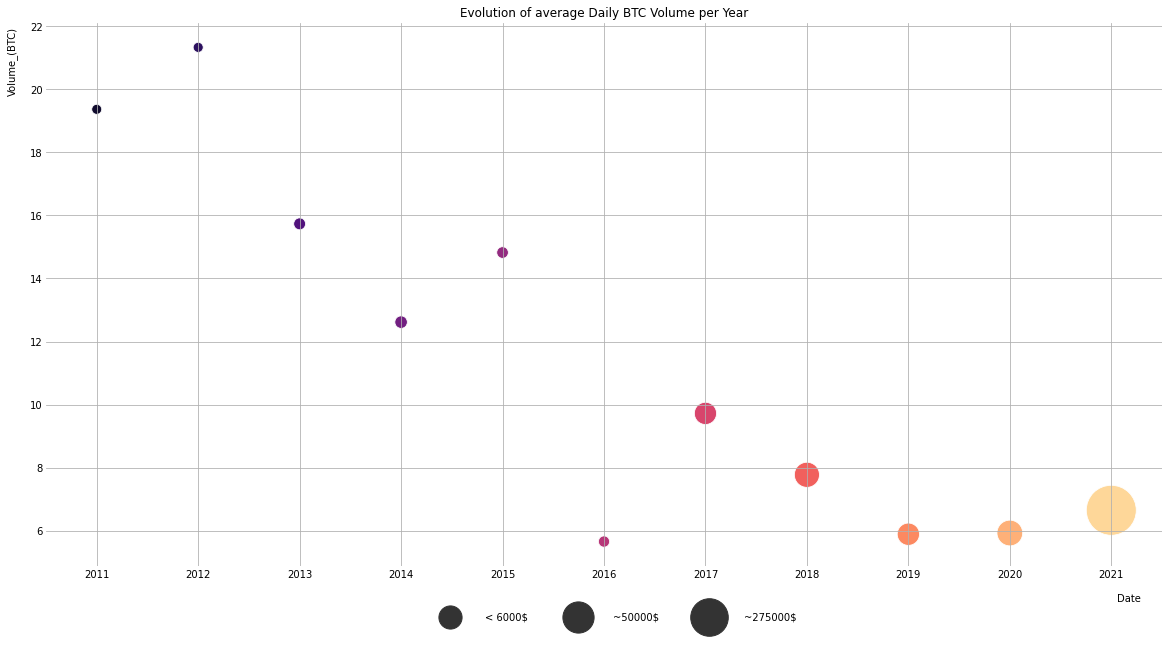

In [21]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(
    x=yearly_mean.index,
    y=yearly_mean['Volume_(BTC)'],
    hue=yearly_mean.index,
    data= yearly_mean,
    size=yearly_mean_currency['Volume_(Currency)'],
    sizes = (100,2500),
    palette="magma"
);
sns.despine(top=True, bottom=True, left=True, right=True)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(b=True)
ax.tick_params(axis=u'both', which=u'both',length=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles[-5],handles[-4],handles[-3]), ('< 6000$','~50000$','~275000$'), bbox_to_anchor=(0.33, -.15, 1., .102), loc='lower left',
           ncol=10, borderpad=2.1, frameon=False, handletextpad=2.5, columnspacing=4)
ax.set_title('Evolution of average Daily BTC Volume per Year');
